# 🧠 Step 1: Load & Explore the Superstore Dataset

### 📌 Goal:
- Load the Superstore dataset from Kaggle
- Fix encoding issues (if any)
- Explore the first few rows and basic info

---

### 📁 Dataset Used:
- **Dataset Name**: Superstore Sales Dataset
- **File**: `SampleSuperstore.csv`
- **Path**: `/kaggle/input/superstore-data/SampleSuperstore.csv`

In [25]:
import pandas as pd
df = pd.read_csv("/kaggle/input/superstore-data/SampleSuperstore.csv", encoding='latin1')  # latin1 we use bcoz there are some special char and bydefault it is UTF8
df.head() #df => dataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 🧼 Step 2: Clean & Prepare Time Series Data

### 1. Clean Column Names
We made all column names lowercase and replaced spaces with underscores to avoid coding errors.

### 2. Convert order_date to Datetime Format
This helps Prophet model understand the time-series nature of the data.

### 3. Group Daily Sales
We summed up sales on the same dates to get one row per day.

### 4. Rename Columns for Prophet
Prophet model requires columns to be named ds for date and y for the value.

### 5. Save Cleaned Data
To reuse or import into Power BI later, we save it as a CSV.

In [26]:
# 1. Clean Column Names
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [27]:
# 2. Convert order_date to Datetime Format
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date                object
ship_mode                object
customer_id              object
customer_name            object
segment                  object
country                  object
city                     object
state                    object
postal_code               int64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
quantity                  int64
discount                float64
profit                  float64
dtype: object

In [28]:
# 3. Group Daily Sales
daily_sales = df.groupby('order_date')['sales'].sum().reset_index()
daily_sales.head()

,order_date,sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [29]:
# 4. Rename Columns for Prophet
daily_sales.columns = ['ds', 'y']
daily_sales.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [30]:
# 5. Save Cleaned Data
daily_sales.to_csv("cleaned_sales.csv", index=False)

# 🔮 Step 3: Forecast Sales using Prophet (ML Model)

### 📦 What is Prophet?
Prophet is a machine learning model developed by Meta (Facebook) to forecast time-series data like sales, weather, etc.

---

### 🚀 What We Did

1. **Installed Prophet** using pip in Kaggle
2. **Loaded cleaned sales data** with columns `ds` (date) and `y` (sales)
3. **Trained Prophet model** on past data
4. **Forecasted next 30 days** using `make_future_dataframe`
5. **Plotted graph** to see future sales trend

---

### 📊 Output

- Forecast table with:
  - `ds`: future dates
  - `yhat`: predicted sales
  - `yhat_lower` and `yhat_upper`: uncertainty range
- Line graph showing past + future sales trend
- Components graph showing weekly/seasonal trend



In [31]:
!pip install prophet

In [34]:
# 2. Import Prophet & Load Clean Data

from prophet import Prophet
import pandas as pd

# Load the cleaned data if needed
df = pd.read_csv("cleaned_sales.csv")  # or use daily_sales if still in memory
df.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [36]:
# 3. Initialize & Train Prophet Model

model = Prophet()
model.fit(df)

17:14:34 - cmdstanpy - INFO - Chain [1] start processing
17:14:34 - cmdstanpy - INFO - Chain [1] done processing


In [38]:
# 4. Create Future Dataframe for Prediction

future = model.make_future_dataframe(periods=30)
future.tail()

,ds
1262,2018-01-25
1263,2018-01-26
1264,2018-01-27
1265,2018-01-28
1266,2018-01-29


In [39]:
# 5. Forecast Future Sales

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1262,2018-01-25,1968.352652,-687.629355,4638.461671
1263,2018-01-26,2265.464482,-403.847806,4890.103521
1264,2018-01-27,1893.923095,-639.981116,4408.225220
1265,2018-01-28,2095.203388,-615.797000,4780.336016
1266,2018-01-29,2313.794582,-344.616197,5348.179644


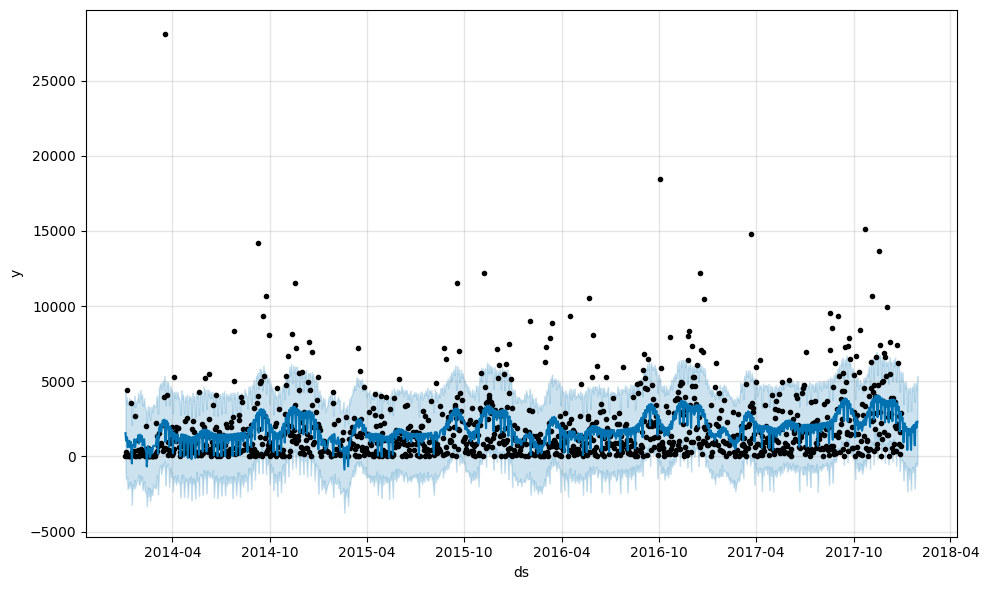

In [40]:
# 6. Plot Forecasted Results

fig = model.plot(forecast)

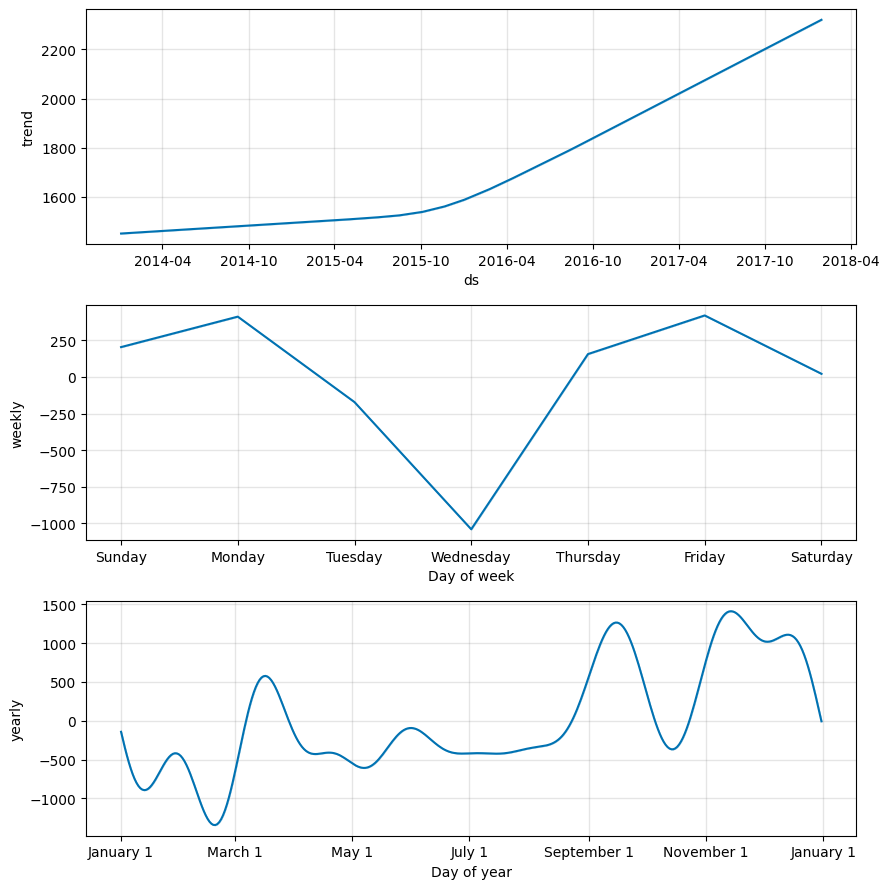

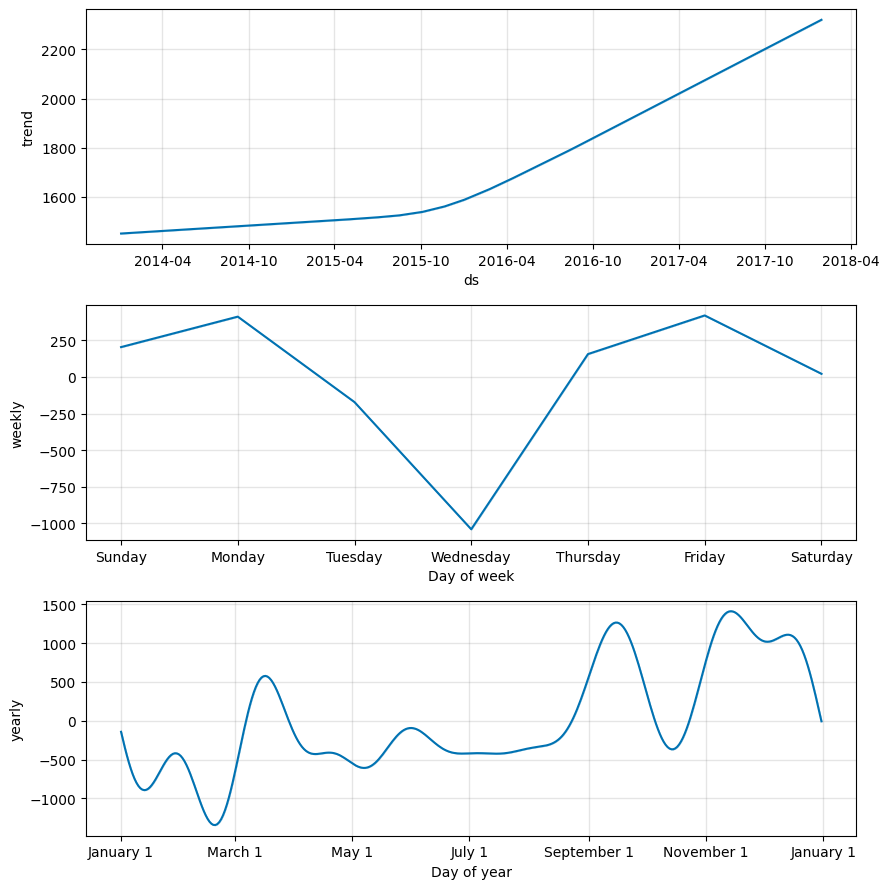

In [41]:
# 7. Plot Trend Components

model.plot_components(forecast)